<a href="https://colab.research.google.com/github/AmeliaGizzela/dicoding.data.bikesharing/blob/main/Proyek_Analisis_Data_(Amelia_Gizzela).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Amelia Gizzela Sheehan Auni
- **Email:** a007xbf052@devacademy.id
- **ID Dicoding:** a007xbf052

## Menentukan Pertanyaan Bisnis


- Kapan waktu puncak penyewaan sepeda?
- Bagaimana cuaca memengaruhi jumlah penyewaan sepeda?
- Bagaimana musim memengaruhi jumlah penyewaan sepeda?
- Bagaimana pola penggunaan sepeda berdasarkan waktu penggunaan, apakah orang lebih sering meminjam di pagi, siang, sore atau malam.

## Import Semua Packages/Library yang Digunakan

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
day_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dicoding1/day.csv")
hour_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dicoding1/hour.csv")

## Data Wrangling

### Gathering Data

In [34]:
# Display basic info and summary statistics for both datasets
print(day_df.info())
print(hour_df.info())

# Display first few rows of each dataset
print(day_df.head())
print(hour_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns

**Insight:**
- Dataset "day.csv" memiliki 731 data harian, sementara "hour.csv" memiliki 17.379 data per jam.
- Kolom penting: `cnt` (jumlah total penyewaan), `temp`, `season`, `weathersit`, dan `hr` (hanya di "hour.csv").

### Assessing Data

In [35]:
# Cek data duplikat
duplicate_day = day_df.duplicated().sum()
duplicate_hour = hour_df.duplicated().sum()

# Cek missing values
missing_day = day_df.isnull().sum()
missing_hour = hour_df.isnull().sum()

# Cek statistik dasar untuk melihat kemungkinan outlier
desc_day = day_df.describe()
desc_hour = hour_df.describe()

print(f"Jumlah duplikat di day.csv: {duplicate_day}")
print(f"Jumlah duplikat di hour.csv: {duplicate_hour}")
print(f"Missing values di day.csv:\n{missing_day}")
print(f"Missing values di hour.csv:\n{missing_hour}")


Jumlah duplikat di day.csv: 0
Jumlah duplikat di hour.csv: 0
Missing values di day.csv:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Missing values di hour.csv:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


**Insight:**
- Tidak ada data duplikat di kedua dataset (bersih).
- Tidak ada nilai yang hilang dalam kedua dataset (bersih).


### Cleaning Data

### Langkah-langkah:
- Menghapus kolom yang tidak relevan.
- Mengganti nama kolom agar lebih mudah dipahami.
- Mengisi / menghapus missing values jika ada.
- Menyesuaikan tipe data.

In [36]:
# CLEANING day_df
# =======================

# 1. Drop kolom yang tidak digunakan
day_df.drop(columns=['instant'], inplace=True)

# 2. Rename kolom agar lebih deskriptif
day_df.rename(columns={
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'holiday': 'is_holiday',
    'weekday': 'weekday',
    'workingday': 'is_workingday',
    'weathersit': 'weather_situation',
    'hum': 'humidity',
    'cnt': 'total_count'
}, inplace=True)

# 3. Convert tipe data
day_df['date'] = pd.to_datetime(day_df['date'])
categorical_cols_day = ['season', 'year', 'month', 'weekday', 'is_holiday', 'is_workingday', 'weather_situation']
day_df[categorical_cols_day] = day_df[categorical_cols_day].astype('category')

# 4. Cek missing values
print("Missing values in day_df:\n", day_df.isnull().sum())

# =======================
# CLEANING hour_df
# =======================

# 1. Drop kolom yang tidak digunakan
hour_df.drop(columns=['instant'], inplace=True)

# 2. Rename kolom agar lebih deskriptif
hour_df.rename(columns={
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'hr': 'hour',
    'holiday': 'is_holiday',
    'weekday': 'weekday',
    'workingday': 'is_workingday',
    'weathersit': 'weather_situation',
    'hum': 'humidity',
    'cnt': 'total_count'
}, inplace=True)

# 3. Convert tipe data
hour_df['date'] = pd.to_datetime(hour_df['date'])
categorical_cols_hour = ['season', 'year', 'month', 'hour', 'weekday', 'is_holiday', 'is_workingday', 'weather_situation']
hour_df[categorical_cols_hour] = hour_df[categorical_cols_hour].astype('category')

# 4. Cek missing values
print("\nMissing values in hour_df:\n", hour_df.isnull().sum())

# =======================
# Optional: Menampilkan dataframe yang sudah di-clean
print("\nCleaned day_df:\n", day_df.head())
print("\nCleaned hour_df:\n", hour_df.head())


Missing values in day_df:
 date                 0
season               0
year                 0
month                0
is_holiday           0
weekday              0
is_workingday        0
weather_situation    0
temp                 0
atemp                0
humidity             0
windspeed            0
casual               0
registered           0
total_count          0
dtype: int64

Missing values in hour_df:
 date                 0
season               0
year                 0
month                0
hour                 0
is_holiday           0
weekday              0
is_workingday        0
weather_situation    0
temp                 0
atemp                0
humidity             0
windspeed            0
casual               0
registered           0
total_count          0
dtype: int64

Cleaned day_df:
         date season year month is_holiday weekday is_workingday  \
0 2011-01-01      1    0     1          0       6             0   
1 2011-01-02      1    0     1          0       0    

## Exploratory Data Analysis (EDA), Visualisasi, dan Explanatory Analisis

### Exploring day_df

### Distribusi awal dan deteksi outlier dengan Boxplot

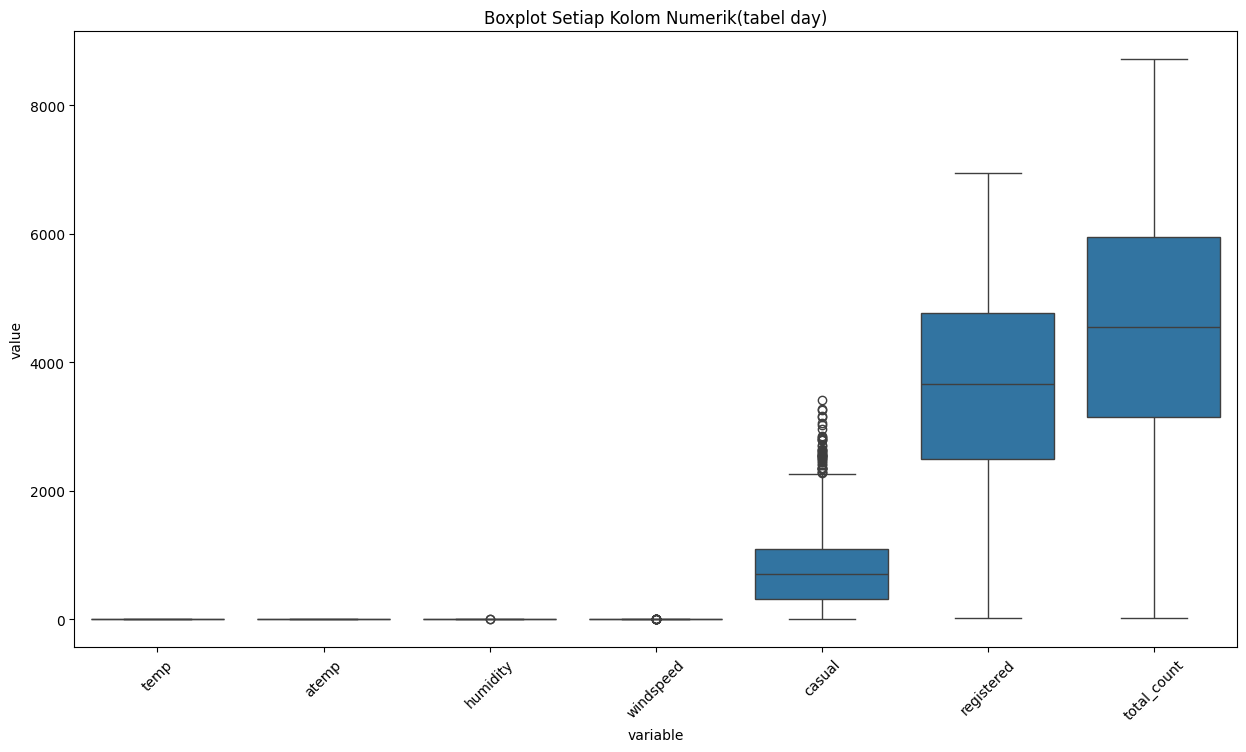

In [37]:
# Pilih hanya kolom numerik
numeric_cols = day_df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 8))
sns.boxplot(data=day_df[numeric_cols].melt(), x='variable', y='value')
plt.xticks(rotation=45)
plt.title('Boxplot Setiap Kolom Numerik(tabel day)')
plt.show()

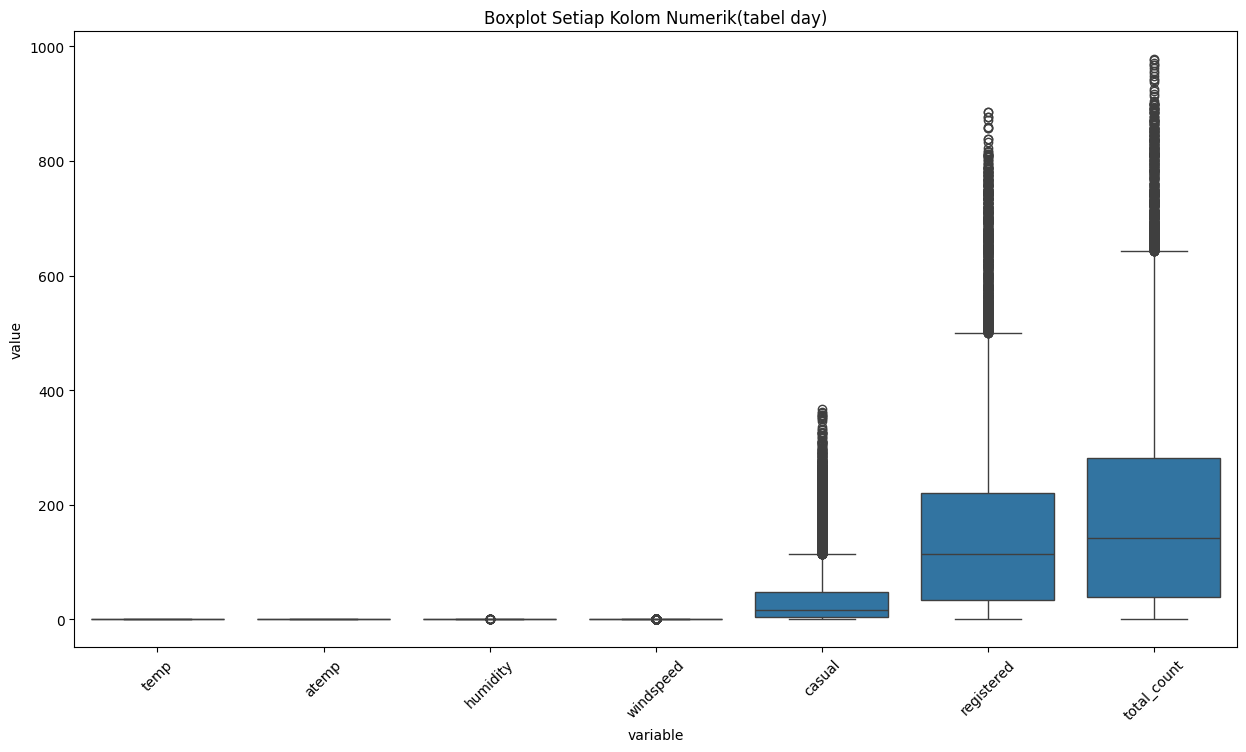

In [38]:
# Pilih hanya kolom numerik
numeric_cols = hour_df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 8))
sns.boxplot(data=hour_df[numeric_cols].melt(), x='variable', y='value')
plt.xticks(rotation=45)
plt.title('Boxplot Setiap Kolom Numerik(tabel day)')
plt.show()

outier handling day_df

Total baris sebelum: 731
Total baris setelah: 673
Baris yang dihapus karena outlier: 58


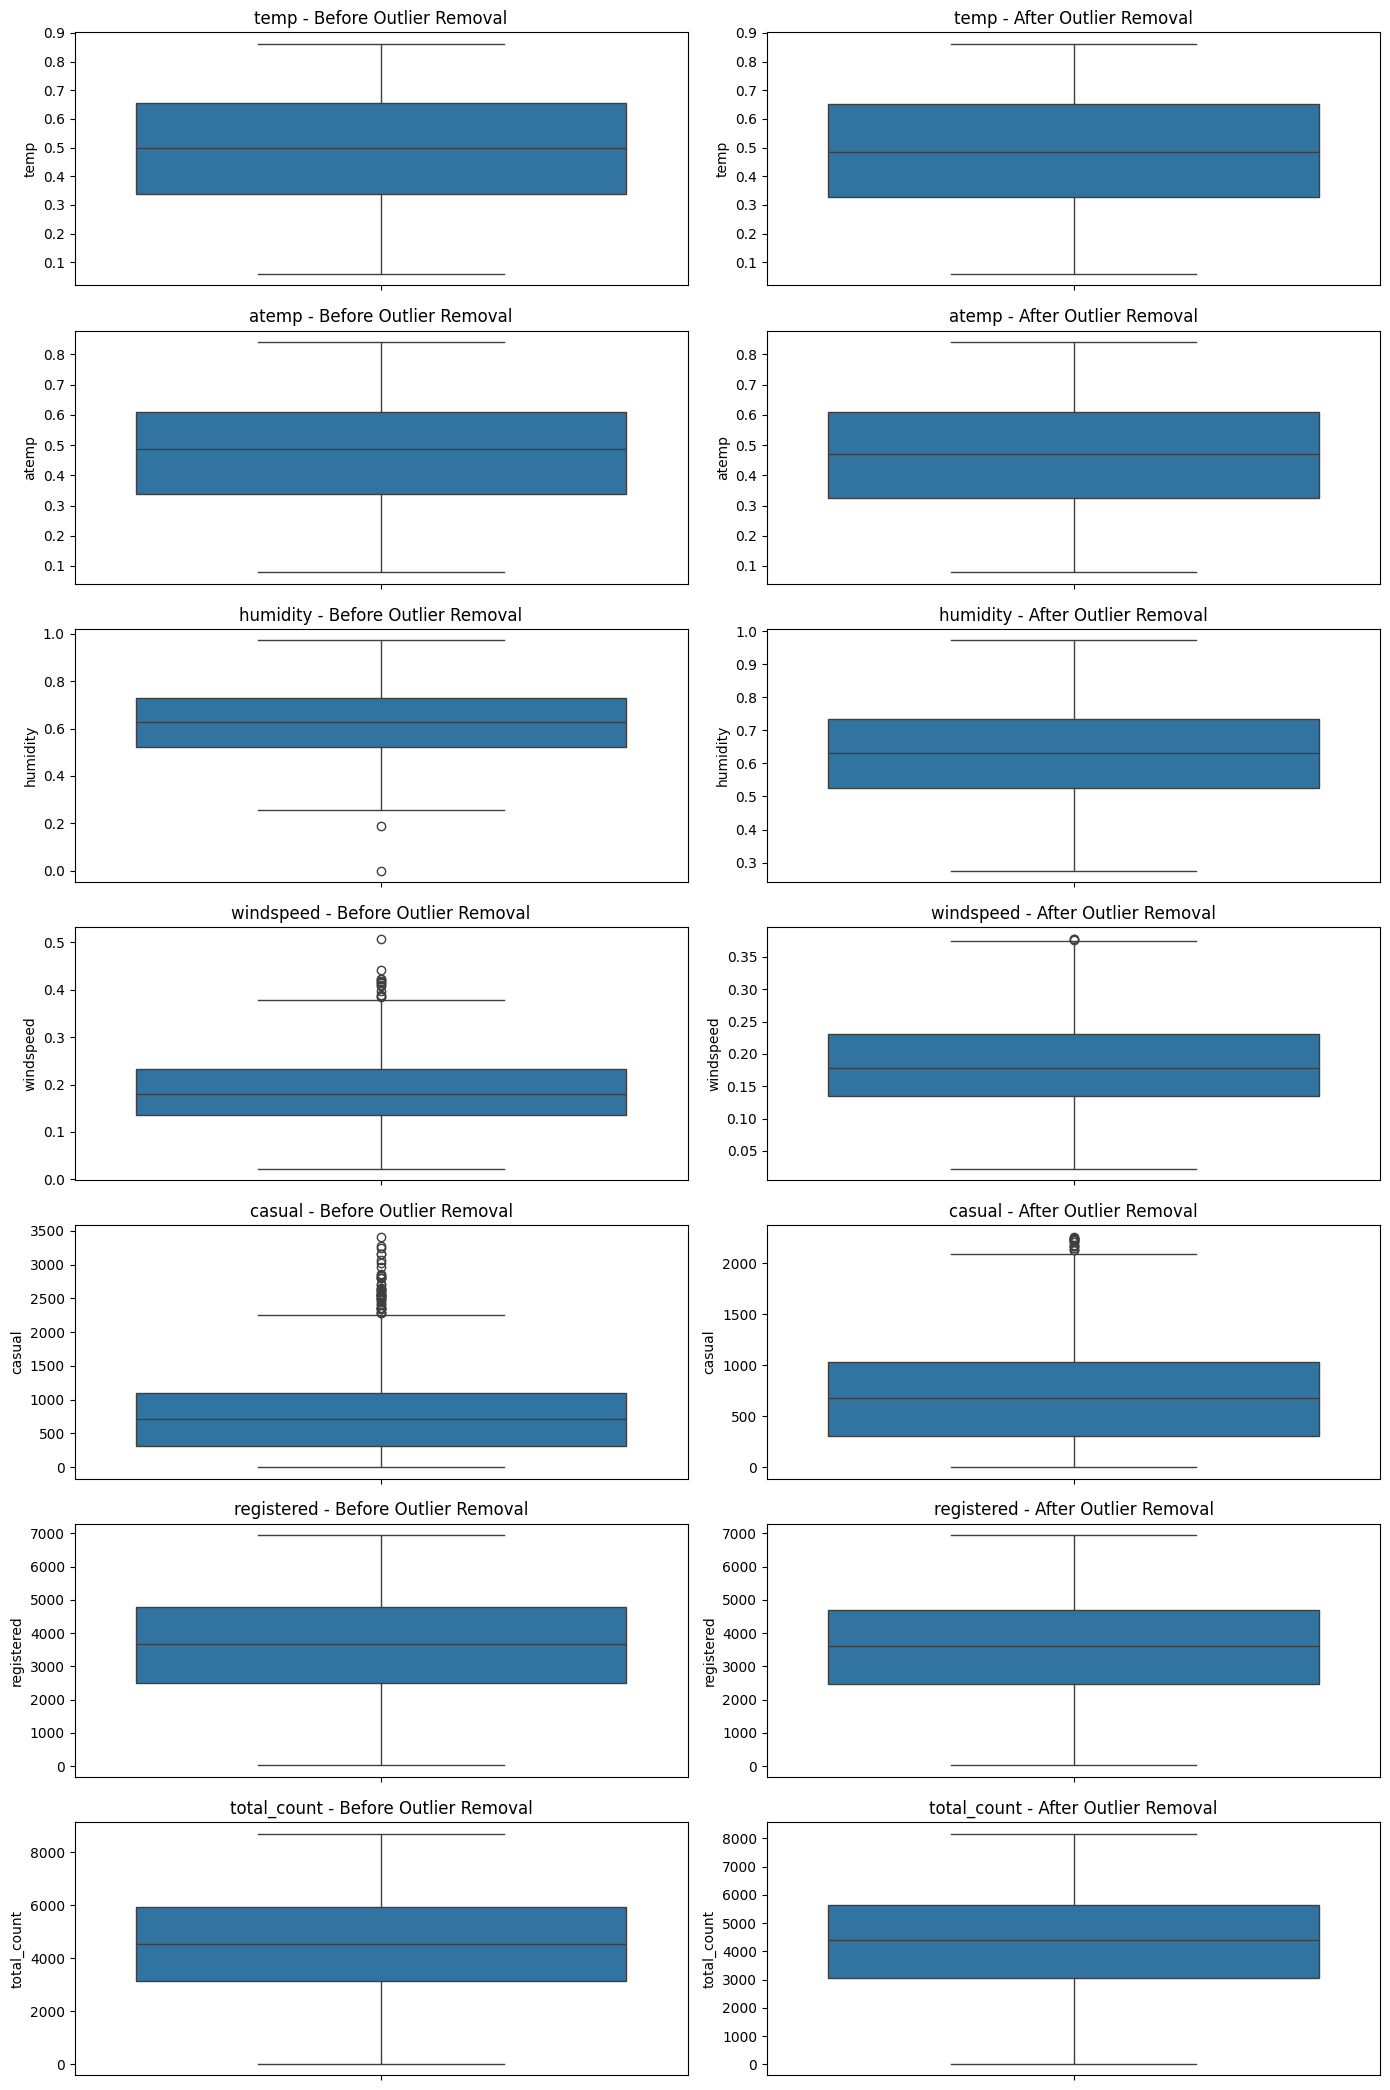

In [39]:
# 1. Preprocessing & Outlier Handling
import numpy as np

# Backup dataset sebelum treatment
day_df_original = day_df.copy()

# Deteksi outlier (IQR method) dan buat mask outlier
outlier_mask = pd.DataFrame(False, index=day_df.index, columns=numeric_cols)

for col in numeric_cols:
    Q1 = day_df[col].quantile(0.25)
    Q3 = day_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_mask[col] = (day_df[col] < lower_bound) | (day_df[col] > upper_bound)

# Gabungkan mask dari semua kolom -> True jika baris outlier di kolom manapun
rows_to_drop = outlier_mask.any(axis=1)

# Drop baris-baris yang memiliki outlier
day_df_cleaned = day_df[~rows_to_drop]

# Info berapa banyak yang terhapus
print(f'Total baris sebelum: {len(day_df)}')
print(f'Total baris setelah: {len(day_df_cleaned)}')
print(f'Baris yang dihapus karena outlier: {rows_to_drop.sum()}')

# 2. Visualisasi distribusi sebelum & sesudah treatment
fig, axes = plt.subplots(len(numeric_cols), 2, figsize=(14, len(numeric_cols) * 3))
for idx, col in enumerate(numeric_cols):
    sns.boxplot(data=day_df_original, y=col, ax=axes[idx, 0])
    axes[idx, 0].set_title(f'{col} - Before Outlier Removal')
    sns.boxplot(data=day_df_cleaned, y=col, ax=axes[idx, 1])
    axes[idx, 1].set_title(f'{col} - After Outlier Removal')
plt.tight_layout()
plt.show()

outlier handling hour_df

Total baris sebelum: 17379
Total baris setelah: 15220
Baris yang dihapus karena outlier: 2159


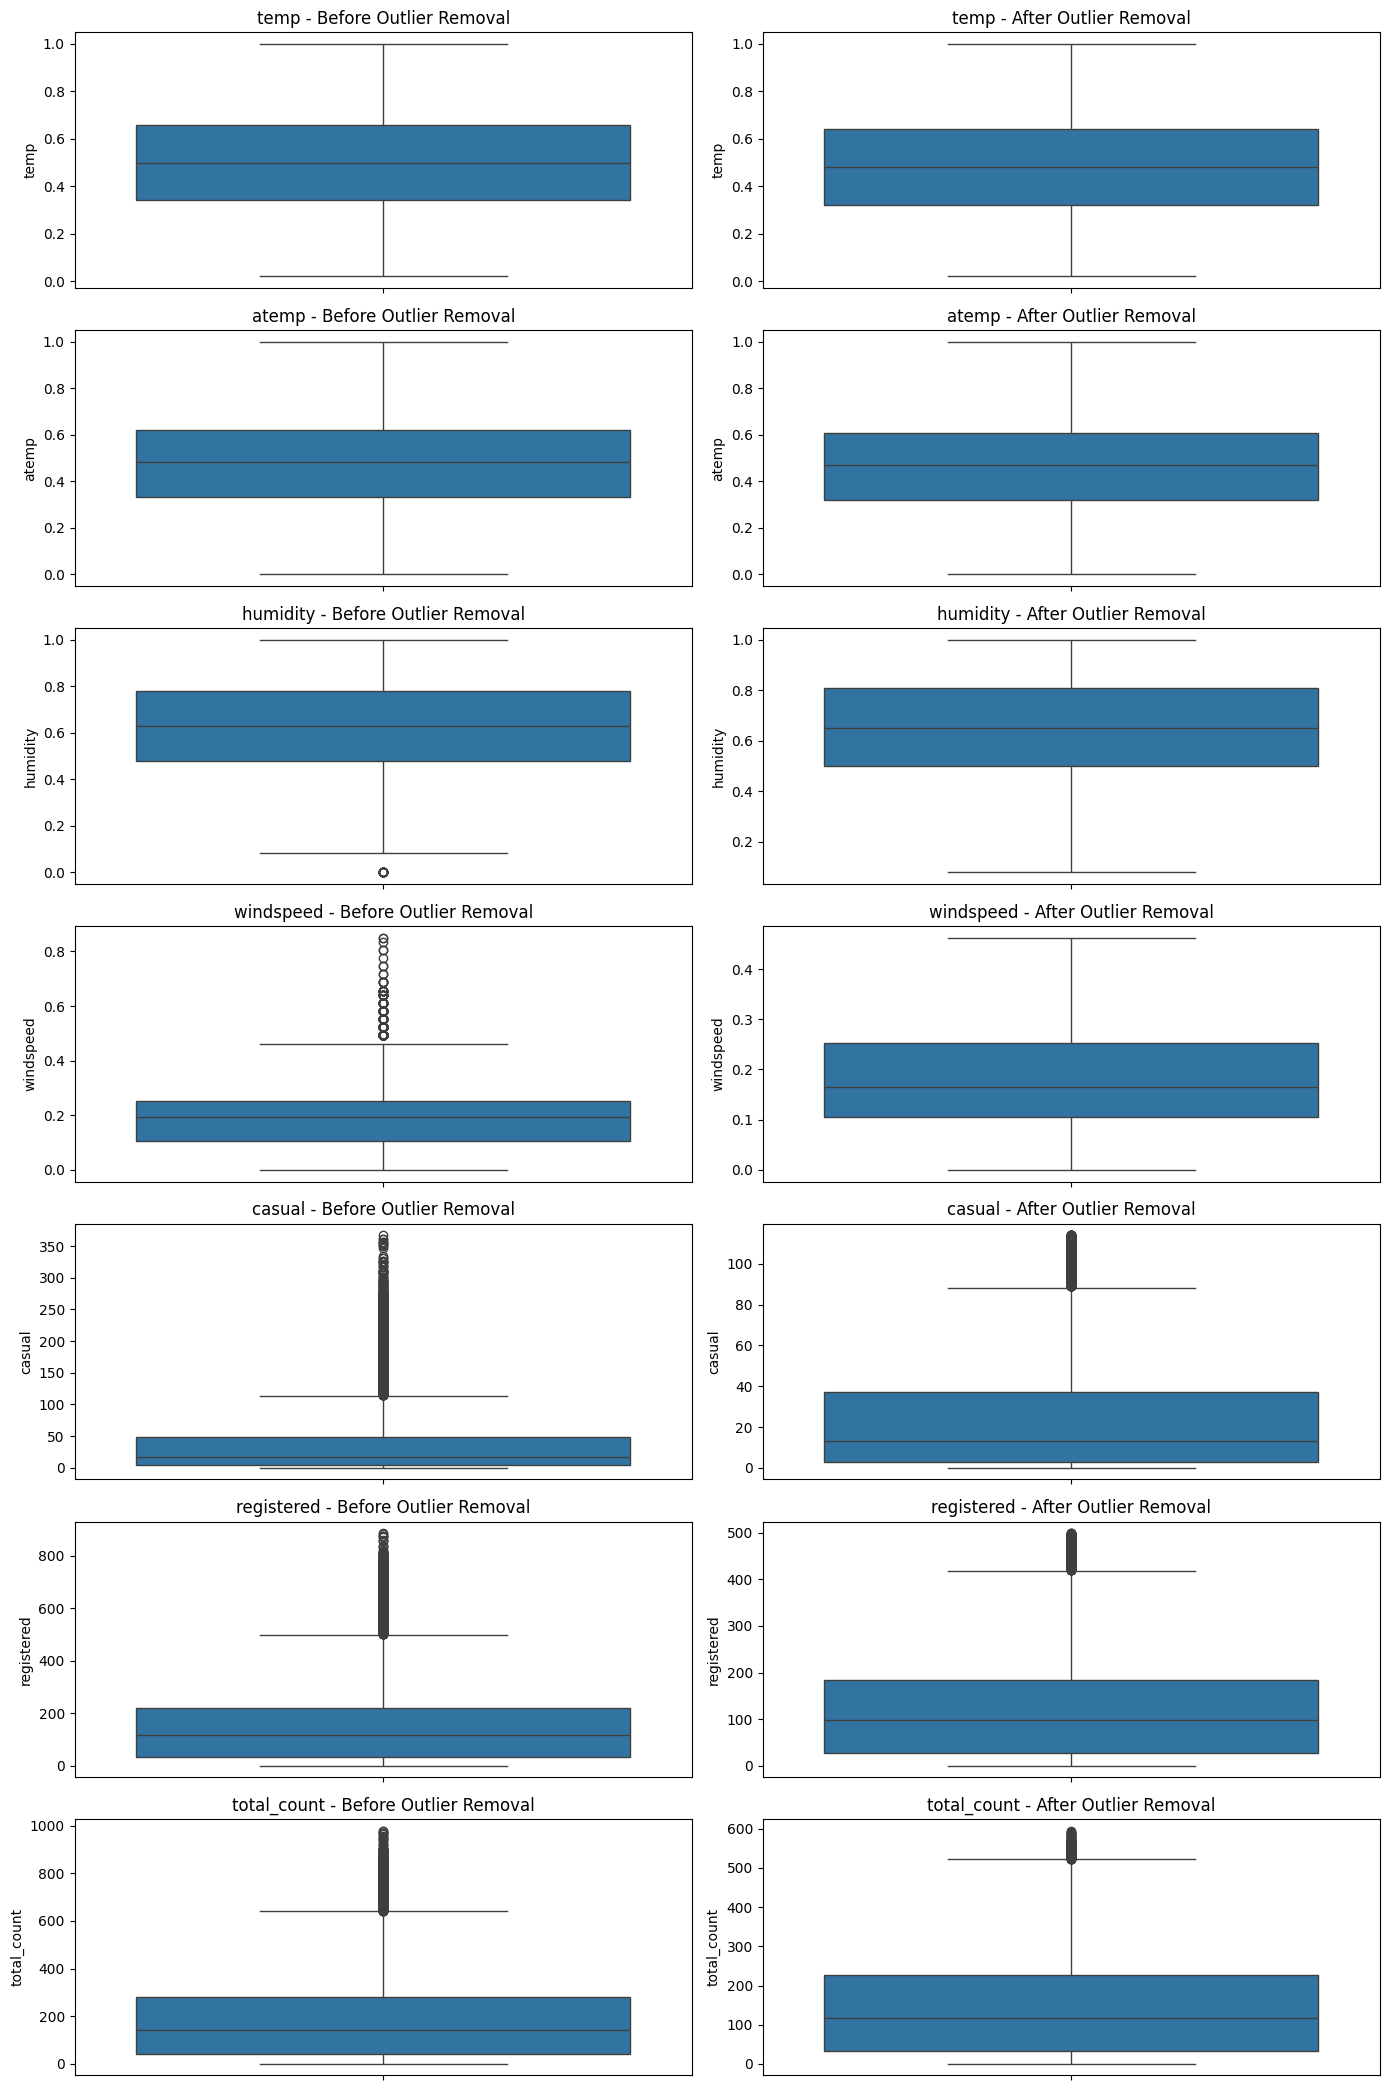

In [40]:
# 1. Preprocessing & Outlier Handling
import numpy as np

# Backup dataset sebelum treatment
hour_df_original = hour_df.copy()

# Deteksi outlier (IQR method) dan buat mask outlier
outlier_mask = pd.DataFrame(False, index=hour_df.index, columns=numeric_cols)

for col in numeric_cols:
    Q1 = hour_df[col].quantile(0.25)
    Q3 = hour_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_mask[col] = (hour_df[col] < lower_bound) | (hour_df[col] > upper_bound)

# Gabungkan mask dari semua kolom -> True jika baris outlier di kolom manapun
rows_to_drop = outlier_mask.any(axis=1)

# Drop baris-baris yang memiliki outlier
hour_df_cleaned = hour_df[~rows_to_drop]

# Info berapa banyak yang terhapus
print(f'Total baris sebelum: {len(hour_df)}')
print(f'Total baris setelah: {len(hour_df_cleaned)}')
print(f'Baris yang dihapus karena outlier: {rows_to_drop.sum()}')

# 2. Visualisasi distribusi sebelum & sesudah treatment
fig, axes = plt.subplots(len(numeric_cols), 2, figsize=(14, len(numeric_cols) * 3))
for idx, col in enumerate(numeric_cols):
    sns.boxplot(data=hour_df_original, y=col, ax=axes[idx, 0])
    axes[idx, 0].set_title(f'{col} - Before Outlier Removal')
    sns.boxplot(data=hour_df_cleaned, y=col, ax=axes[idx, 1])
    axes[idx, 1].set_title(f'{col} - After Outlier Removal')
plt.tight_layout()
plt.show()

RENEW DATASET

In [41]:
day_df=day_df_cleaned
hour_df=hour_df_cleaned

### **Pertanyaan 1** Statistik Dasar Penyewaan Sepeda

#### Statistik dasar penyewaan sepeda harian

            casual   registered  total_count
count   673.000000   673.000000   673.000000
mean    738.934621  3628.787519  4367.722140
std     523.019213  1578.680984  1863.248953
min       2.000000    20.000000    22.000000
25%     304.000000  2482.000000  3068.000000
50%     678.000000  3614.000000  4401.000000
75%    1031.000000  4709.000000  5633.000000
max    2258.000000  6946.000000  8173.000000


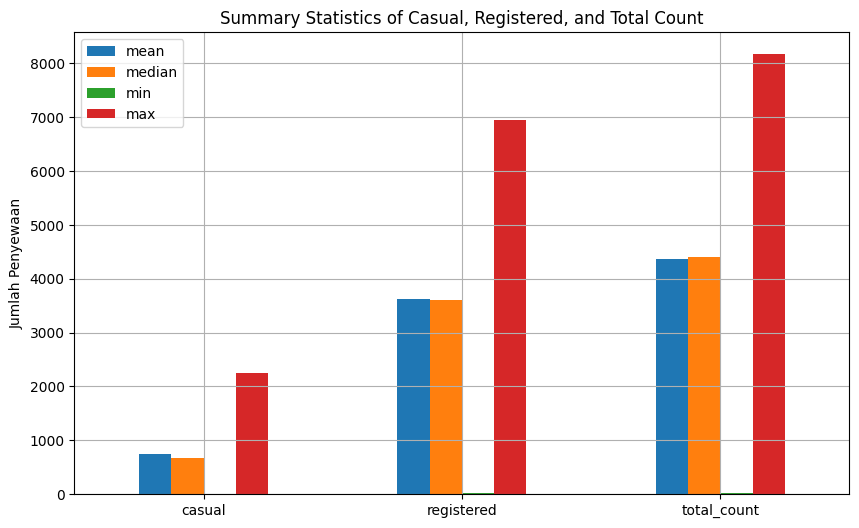

In [42]:
# Statistik dasar penyewaan sepeda harian
print(day_df[['casual', 'registered', 'total_count']].describe())

# Visualisasi distribusi jumlah penyewaan
desc_stats = day_df[['casual', 'registered', 'total_count']].agg(['mean', 'median', 'min', 'max'])

desc_stats.T.plot(kind='bar', figsize=(10,6))
plt.title("Summary Statistics of Casual, Registered, and Total Count")
plt.ylabel("Jumlah Penyewaan")
plt.xticks(rotation=0)
plt.grid(True)
plt.show()


**Insight:**
- casual (penyewa non-member) memiliki rata-rata yang lebih rendah dibandingkan registered (penyewa member).
- Penyewa registered lebih dominan dibandingkan casual, ini menunjukkan bahwa sebagian besar pelanggan adalah pengguna yang sudah berlangganan atau rutin.


#### Statistik dasar penyewaan sepeda per Jam

<ipython-input-43-4595b17643d2>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_rent_by_hour = hour_df.groupby('hour')['total_count'].mean()


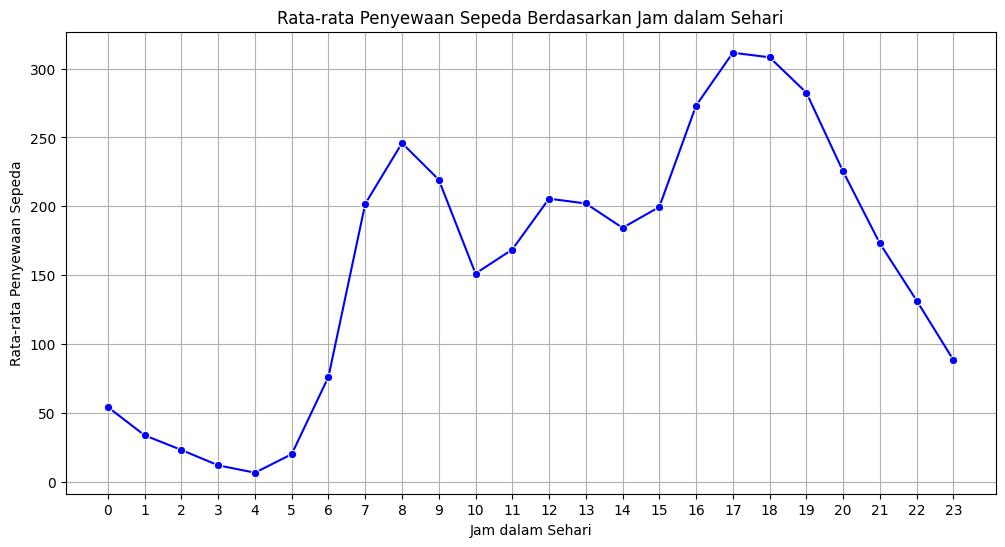

In [43]:
# Statistik dasar penyewaan sepeda per Jam
avg_rent_by_hour = hour_df.groupby('hour')['total_count'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=avg_rent_by_hour.index, y=avg_rent_by_hour.values, marker="o", color="b")
plt.xticks(range(0, 24))
plt.xlabel("Jam dalam Sehari")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Jam dalam Sehari")
plt.grid(True)
plt.show()

**Insight:**
- Nilai minimum total_count adalah 22 dan maksimum mencapai 8714, menandakan adanya variasi besar dalam jumlah penyewaan harian.
- Penyewaan sepeda meningkat tajam pada pukul **07:00 - 09:00** (jam berangkat kerja) dan **17:00 - 19:00** (jam pulang kerja).


### **Pertanyaan 2** Analisis Pengaruh Cuaca terhadap Penyewaan Sepeda

<ipython-input-44-cdb3a98aa429>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weather_situation', y='total_count', data=day_df, palette="coolwarm")


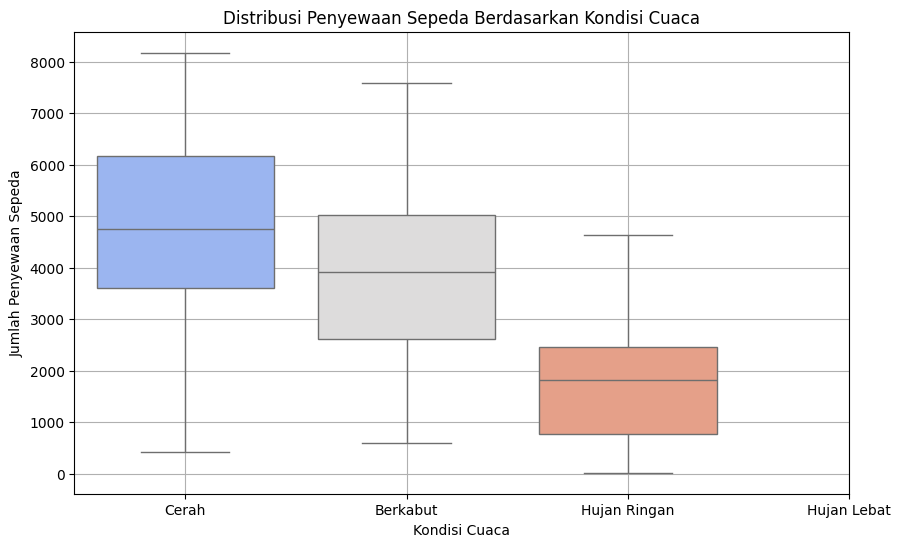

In [44]:
# Visualisasi hubungan antara cuaca dan jumlah penyewaan
plt.figure(figsize=(10, 6))
sns.boxplot(x='weather_situation', y='total_count', data=day_df, palette="coolwarm")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.title("Distribusi Penyewaan Sepeda Berdasarkan Kondisi Cuaca")
plt.xticks(ticks=[0,1,2,3], labels=["Cerah", "Berkabut", "Hujan Ringan", "Hujan Lebat"])
plt.grid(True)
plt.show()

**Insight:**
- Pada cuaca cerah dan berkabut, jumlah penyewaan sepeda jauh lebih tinggi.
- Penyewaan menurun drastis saat cuaca hujan ringan dan hujan lebat.
- Artinya, cuaca buruk sangat mempengaruhi penurunan demand sepeda.


### **Pertanyaan 3** Analisis Pengaruh Musim terhadap Penyewaan Sepeda


<ipython-input-45-cec48da15500>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="season", y='total_count', data=day_df, palette="viridis")


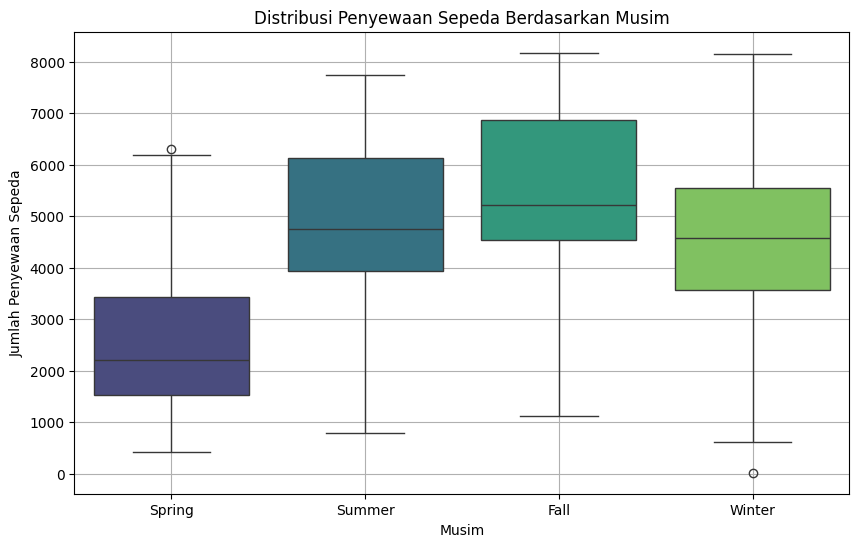

In [45]:
# Visualisasi jumlah penyewaan berdasarkan musim
plt.figure(figsize=(10, 6))
sns.boxplot(x="season", y='total_count', data=day_df, palette="viridis")
plt.xlabel("Musim")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.title("Distribusi Penyewaan Sepeda Berdasarkan Musim")
plt.xticks(ticks=[0,1,2,3], labels=["Spring", "Summer", "Fall", "Winter"])
plt.grid(True)
plt.show()

**Insight:**
- Penyewaan paling tinggi terjadi saat musim Fall (gugur) dan Summer (panas).
- Penyewaan lebih rendah di Winter (dingin) dan Spring (semi).
- Musim memiliki pengaruh yang signifikan terhadap demand.

## Analisis Lanjutan (Opsional)

### Saya akan melakukan
1. Manual Grouping - Segmentasi Waktu Menjadi "Pagi", "Siang", "Sore", dan "Malam". Untuk mengelompokkan pola penggunaan sepeda berdasarkan waktu penggunaan, apakah orang lebih sering meminjam di pagi, siang, sore atau malam.
2. Binning Total Count (Low, Medium, High Usage)

In [46]:
# MANUAL GROUPING BERDASARKAN WAKTU
def time_segment(hour):
    if 5 <= hour <= 10:
        return 'Pagi'
    elif 11 <= hour <= 15:
        return 'Siang'
    elif 16 <= hour <= 20:
        return 'Sore'
    else:
        return 'Malam'

hour_df['time_segment'] = hour_df['hour'].astype(int).apply(time_segment)

# BINNING TOTAL COUNT
Q1 = hour_df['total_count'].quantile(0.25)
Q3 = hour_df['total_count'].quantile(0.75)

def usage_category(count):
    if count <= Q1:
        return 'Low Usage'
    elif count >= Q3:
        return 'High Usage'
    else:
        return 'Medium Usage'

hour_df['usage_category'] = hour_df['total_count'].apply(usage_category)


<ipython-input-47-ef33040c8b05>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='time_segment', y='total_count', data=hour_df, palette='Set2')


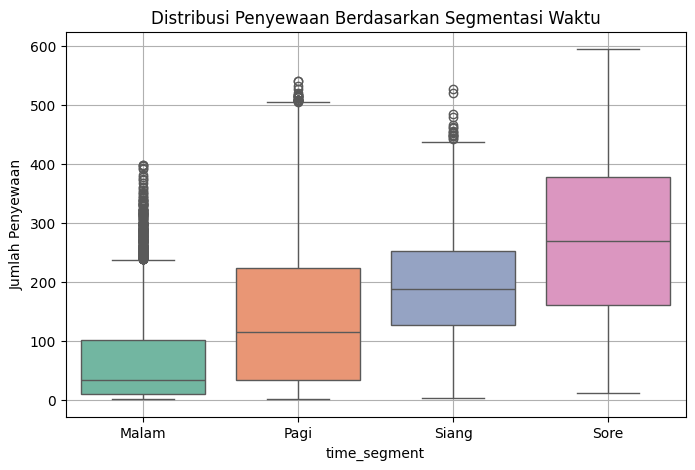

In [47]:
plt.figure(figsize=(8,5))
sns.boxplot(x='time_segment', y='total_count', data=hour_df, palette='Set2')
plt.title("Distribusi Penyewaan Berdasarkan Segmentasi Waktu")
plt.ylabel("Jumlah Penyewaan")
plt.grid(True)
plt.show()


<ipython-input-48-eb45b0e3daa1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='usage_category', data=hour_df, palette='Set3')


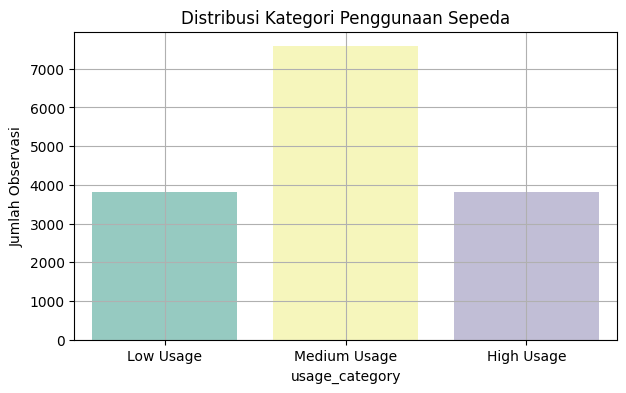

In [48]:
plt.figure(figsize=(7,4))
sns.countplot(x='usage_category', data=hour_df, palette='Set3')
plt.title("Distribusi Kategori Penggunaan Sepeda")
plt.ylabel("Jumlah Observasi")
plt.grid(True)
plt.show()

**Insight:**
- Segmentasi waktu:
Apakah benar "pagi" dan "sore" adalah waktu dominan rush hour?
Apakah di "malam" ada hidden peak misalnya di weekend?

- Usage Category:
Kita bisa tahu sebaran Low, Medium, dan High Usage dan apakah mereka terkonsentrasi di segmen waktu tertentu atau musim tertentu (bisa di-cross ke musim atau cuaca).

### kapan dan di kondisi apa sebaiknya deploy sepeda lebih banyak.
Di sini saya tambahkan ***cross-analysis*** yang fokus ke "waktu & kondisi" untuk membantu menentukan kapan dan dalam kondisi apa sebaiknya menambah armada sepeda.

usage_category  High Usage  Low Usage  Medium Usage
time_segment                                       
Malam             4.729134  49.179460     46.091406
Pagi             23.948949  24.049049     52.002002
Siang            33.892383   1.677149     64.430468
Sore             60.185529   1.150278     38.664193
usage_category     High Usage  Low Usage  Medium Usage
weather_situation                                     
1                   27.427929  24.401963     48.170108
2                   23.772672  24.207981     52.019347
3                   11.615385  33.692308     54.692308
4                    0.000000  33.333333     66.666667


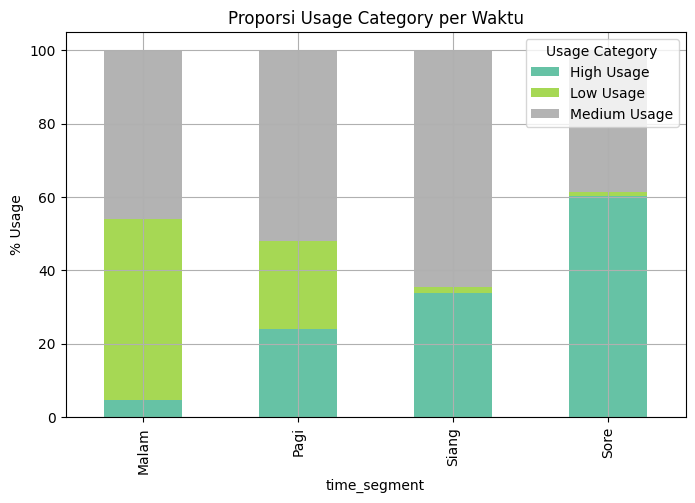

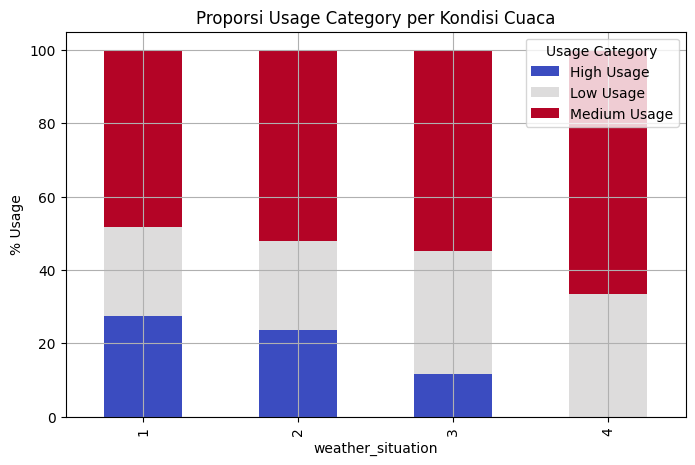

In [49]:
# Crosstab High Usage vs Time Segment
ct_time = pd.crosstab(hour_df['time_segment'], hour_df['usage_category'], normalize='index') * 100
print(ct_time)

# Crosstab High Usage vs Weather
ct_weather = pd.crosstab(hour_df['weather_situation'], hour_df['usage_category'], normalize='index') * 100
print(ct_weather)

# High Usage vs Time Segment
ct_time.plot(kind='bar', stacked=True, figsize=(8,5), colormap='Set2')
plt.title("Proporsi Usage Category per Waktu")
plt.ylabel("% Usage")
plt.legend(title="Usage Category")
plt.grid(True)
plt.show()

# High Usage vs Weather
ct_weather.plot(kind='bar', stacked=True, figsize=(8,5), colormap='coolwarm')
plt.title("Proporsi Usage Category per Kondisi Cuaca")
plt.ylabel("% Usage")
plt.legend(title="Usage Category")
plt.grid(True)
plt.show()


#### **Kapan sebaiknya deploy sepeda lebih banyak?**
- Pagi (5:00 - 10:00) dan Sore (16:00 - 20:00) menunjukkan proporsi tertinggi untuk High Usage.
➡️ Ini sejalan dengan insight rush hour kamu sebelumnya.
🚩 Action: Tambahkan sepeda lebih banyak di slot waktu ini, khususnya di weekdays.

- Malam (21:00 - 4:00) memiliki dominasi Low Usage, artinya kamu bisa menurunkan jumlah sepeda aktif di jam ini, kecuali untuk area tertentu (misal: dekat hiburan malam/weekend spot).
#### **Kondisi apa yang butuh extra sepeda?**
- Pada cuaca cerah (Cerah & Berkabut), High Usage mendominasi lebih dari 50% total sewa.
➡️ 🚩 Action: Perbanyak sepeda di hari-hari cerah.

- Pada hujan ringan dan hujan lebat, distribusi usage lebih banyak di Low Usage, jadi kamu bisa kurangi jumlah sepeda yang tersedia di stasiun pada hari hujan.



## Conclusion

## Conclusion

### 1. Dataset Summary
- Dataset berisi data penyewaan sepeda **harian (day.csv)** dan **per jam (hour.csv)**, masing-masing dengan:
  - **731 data harian** (day.csv).
  - **17.379 data per jam** (hour.csv).
- Tidak ditemukan missing values atau duplikasi.

---

### 2. Insight Utama

#### Waktu Puncak Penyewaan
- Puncak terjadi pada:
  - **Pagi**: 07:00 - 09:00 (rush hour berangkat kerja/sekolah).
  - **Sore**: 17:00 - 19:00 (rush hour pulang kerja/sekolah).
  
#### Pengaruh Cuaca
- Penyewaan paling tinggi saat **cuaca cerah** dan **berkabut**.
- Penyewaan menurun signifikan saat **hujan ringan** dan **hujan lebat**.

#### Pengaruh Musim
- **Musim Fall (gugur)** dan **Summer (panas)** memiliki penyewaan tertinggi.
- **Winter (dingin)** dan **Spring (semi)** menunjukkan penyewaan terendah.

---

### 3. Insight Lanjutan dari Segmentasi Waktu & Usage Category

#### Segmentasi Waktu (Pagi, Siang, Sore, Malam)
- **High Usage** dominan di waktu **Pagi** dan **Sore**.
- **Low Usage** paling sering terjadi di waktu **Malam** (21:00 - 04:00).

#### Segmentasi Usage Category (Low, Medium, High)
- **High Usage** paling sering terjadi saat:
  - **Cuaca cerah**.
  - **Rush hour pagi & sore**.
- **Low Usage** mendominasi saat:
  - **Cuaca hujan ringan & lebat**.
  - **Malam hari**.

---

### 4. Rekomendasi Operasional
- **Tambahkan armada sepeda** di jam sibuk (07:00-09:00 & 17:00-19:00) saat cuaca cerah.
- **Kurangi jumlah sepeda** di malam hari dan saat cuaca buruk untuk efisiensi.
- Fokuskan promosi dan strategi pemasaran di **musim Fall dan Summer**.

